# SALES DATASET (EDA AND PREPROCESSING)

In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

In [2]:
df=pd.read_excel("Sample - Superstore Sales (Excel).xlsx")
df["Year"]=pd.to_datetime(df["Order Date"]).dt.year
df["Month"]=pd.to_datetime(df["Order Date"]).dt.month
df["Day"]=pd.to_datetime(df["Order Date"]).dt.day
df["TotalSales"]=df["Sales"]*df["Order Quantity"]
df["Totalprofit"]=df["Profit"]*df["Order Quantity"]
df["Totalexpenditure"]=df["TotalSales"]-df["Totalprofit"]
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Product Name,Product Container,Product Base Margin,Ship Date,Year,Month,Day,TotalSales,Totalprofit,Totalexpenditure
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,2010,10,13,1569.240,-1279.5000,2848.7400
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,2012,10,1,496027.980,22432.6900,473595.2900
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2012,10,1,6603.390,1261.1025,5342.2875
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,R380,Small Box,0.58,2011-07-12,2011,7,10,148972.785,35969.1300,113003.6550
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,2010,8,28,7491.130,587.8600,6903.2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09,2010,8,9,10352.320,-2585.4400,12937.7600
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11,2010,8,9,9029.110,511.7500,8517.3600
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,"Executive Impressions 14""",Small Pack,0.41,2011-04-10,2011,4,8,30479.860,12692.8500,17787.0100
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Talkabout T8367,Small Box,0.56,2011-04-09,2011,4,8,3758.700,-1273.8880,5032.5880


In [9]:
#Q1- plotting year and month wise trends of Profit and sales using measures of central tendency(mean,median,mode)-
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].max().iplot(kind="bar")
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].min().iplot(kind="bar")
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].mean().iplot(kind="bar")
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].sum().iplot(kind="bar")


C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3352298165.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3352298165.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3352298165.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3352298165.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [10]:
df.set_index("Order Date")[["Totalprofit","TotalSales"]].iplot(kind="line",mode="markers")
#plotting scatterplot by setting Order Date as datetimeindex.
#can look out for anomalies in Total Sales and profit here during a particular datetime index.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/456174318.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/456174318.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/456174318.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/456174318.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Year,Month'>

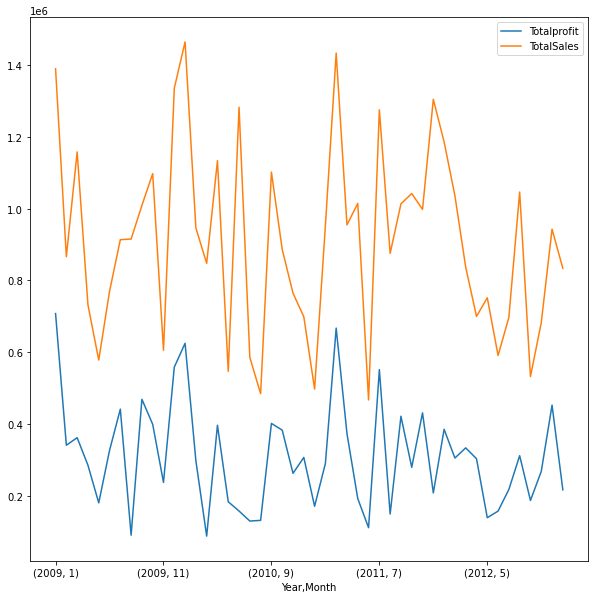

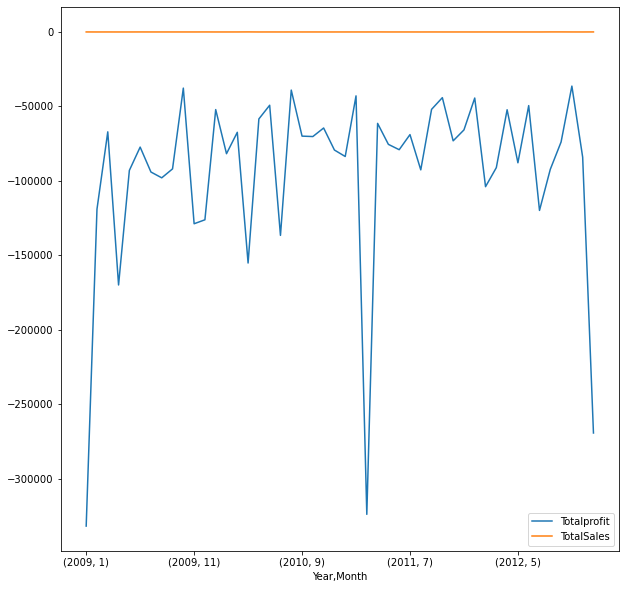

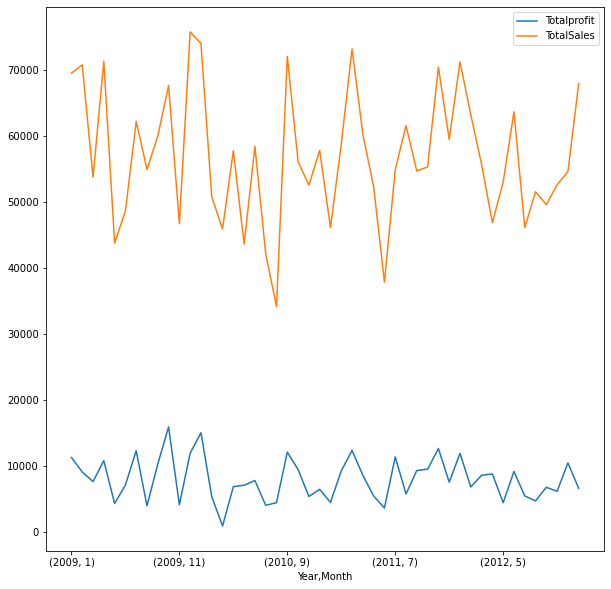

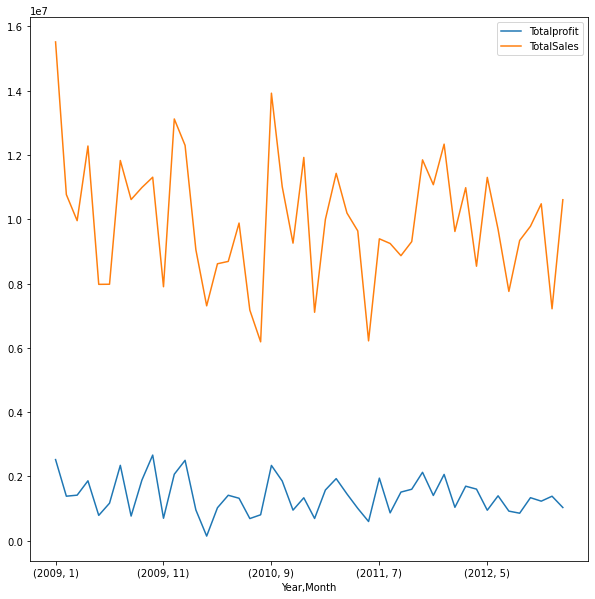

In [13]:
#Q1-line plot for better trend visualization-
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].max().plot(kind="line",figsize=(10,10))
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].min().plot(kind="line",figsize=(10,10))
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].mean().plot(kind="line",figsize=(10,10))
df.groupby(["Year","Month"])["Totalprofit","TotalSales"].sum().plot(kind="line",figsize=(10,10))
#seeing the above trends,we can easily make out record high and record low and avg totalsales and totalprofit,as well as comparing the total sales and total profit during a particular timeframe. 

In [8]:
#Q2-Trend in profit/sales over region (years/months/quarters)-(barplot)
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].max().iplot(kind="bar")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].min().iplot(kind="bar")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].mean().iplot(kind="bar")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].sum().iplot(kind="bar")


C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/765224605.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/765224605.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/765224605.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/765224605.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].max().iplot(kind="line")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].mean().iplot(kind="line")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].min().iplot(kind="line")
df.groupby(["Region","Year","Month"])["TotalSales",'Totalprofit'].sum().iplot(kind="line")
#comparing trends in as per region,year,month and fetching key findings and trends.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3602794322.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3602794322.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3602794322.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3602794322.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
#Q2-Trend in profit/sales over region (years/months/quarters)- #better clarity of trend varying yearwise
df.groupby(["Region","Year"])["TotalSales",'Totalprofit'].max().iplot(kind="line")
df.groupby(["Region","Year"])["TotalSales",'Totalprofit'].min().iplot(kind="line")

f.groupby(["Region","Year"])["TotalSales",'Totalprofit'].mean().iplot(kind="line")



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1119575346.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1119575346.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1119575346.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [168]:
Q3-#Product (Segment/Category) with highest and lowest sales.

In [20]:

df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].max().iplot(kind="bar")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].min().iplot(kind="bar")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].mean().iplot(kind="bar")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].sum().iplot(kind="bar")
#inferences regarding record high,record low,average,summation of total sales and profit can be compared by segmenting over customer segment and profuct category

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3658159612.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3658159612.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3658159612.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/3658159612.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [23]:
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].max().iplot(kind="line")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].min().iplot(kind="line")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].mean().iplot(kind="line")
df.groupby(["Customer Segment","Product Category"])["TotalSales",'Totalprofit'].sum().iplot(kind="line")

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1885478840.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1885478840.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1885478840.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1885478840.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [226]:
#Q4-creative eda part
profit=df["Totalprofit"].sum()
Sales=df["TotalSales"].sum()
print("Revenue Generated:",np.round(df["Totalprofit"].sum(),2))
print("Total expenditure or operational cost:",np.round(Sales-profit,2))
print("Percentage Profit:",np.round((profit/Sales)*100))


Revenue Generated: 67241922.52
Total expenditure or operational cost: 410346327.84
Percentage Profit: 14.0


<AxesSubplot:xlabel='Order Date'>

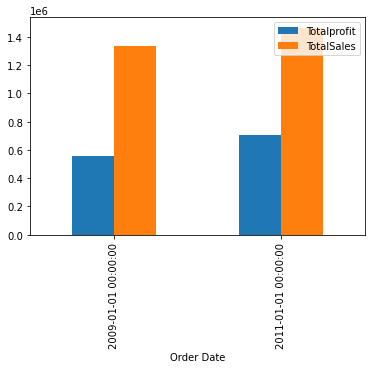

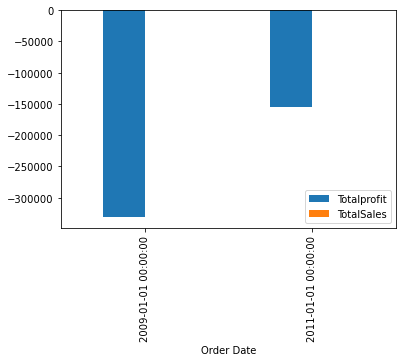

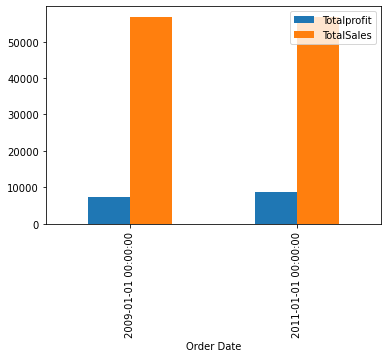

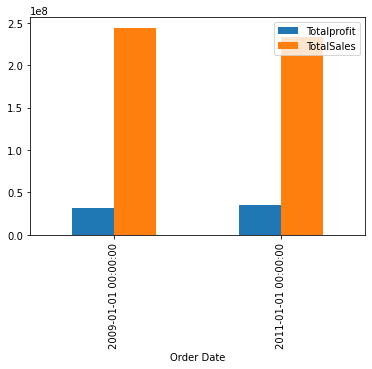

In [25]:
#comparing biyearly trend of profit and sale-
df["Order Date"]=sorted(df["Order Date"])  
df.set_index("Order Date").resample("2AS")["Totalprofit","TotalSales"].max().plot(kind="bar") 
df.set_index("Order Date").resample("2AS")["Totalprofit","TotalSales"].min().plot(kind="bar") 
df.set_index("Order Date").resample("2AS")["Totalprofit","TotalSales"].mean().plot(kind="bar")
df.set_index("Order Date").resample("2AS")["Totalprofit","TotalSales"].sum().plot(kind="bar")

In [26]:
df.groupby("Order Priority")["TotalSales","Totalprofit"].sum().iplot(kind="bar")
#high and low priority orders have fetched more sales and profit
#as it can be inferred that low prioirty orders have been fetching maximum total sales whereas high priority orders are fetching maximum profit
#stakeholder can try and create more profit margin for low priority orders as well.

C:\Users\UTILIZER\AppData\Local\Temp/ipykernel_19804/1762770586.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [27]:
#expenditure analysis acccording to Customer segment-
df.groupby("Customer Segment")['Totalexpenditure'].sum().iplot(kind="bar")
#corporate segment total expenditure is high(management can implement and devise new ways and strategy to tackle it)

In [28]:
#further segmenting customer segment into product category-
df.groupby(["Customer Segment","Product Category"])["Totalexpenditure"].sum().iplot(kind="bar")
#being specific about earlier inference corporate furniture has cost a lot

In [29]:
df.groupby("Ship Mode")["Totalprofit"].sum().iplot(kind="bar")
#bulk of profits have occured by regularairways.

In [30]:
df.groupby("Ship Mode")["Totalexpenditure"].sum().iplot(kind="bar")
#compared to above plot Truck delivery mode is prone to loss making
#stakeholders can arrive at a decision to control its expenditure by finding root causes behind it

In [31]:
df.groupby("Customer Segment")["Order Quantity"].sum() 
#management can increase the price in segment where quantity sold is less and give calculated discounts to our most regular customer and leverage its loyalty.  

Customer Segment
Consumer          41760
Corporate         78517
Home Office       52807
Small Business    41693
Name: Order Quantity, dtype: int64

<AxesSubplot:ylabel='Totalprofit'>

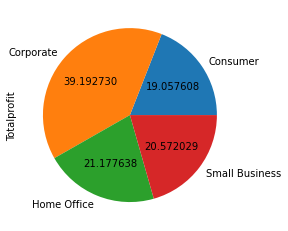

In [11]:
#every Customer Segment Share in profit
df.groupby(["Customer Segment"])["Totalprofit"].sum().plot(kind="pie",autopct="%2f")
#corporate segment fetching maximum profit 

<AxesSubplot:ylabel='Totalexpenditure'>

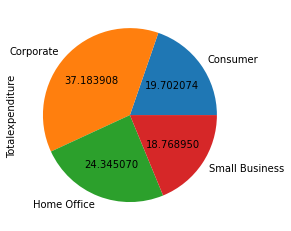

In [12]:
#every customer segment share in expenditure-
df.groupby(["Customer Segment"])["Totalexpenditure"].sum().plot(kind="pie",autopct="%2f")
#corporate segement amounting to more expenditure as well.


In [23]:
#Checking null values-
df.isnull().sum() #we can drop the product base margin if it holds less significance its hold less scolumn during preprocessing

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
Year                     0
Month                    0
Day                      0
TotalSales               0
Totalprofit              0
Totalexpenditure         0
dtype: int64

<AxesSubplot:ylabel='Totalprofit'>

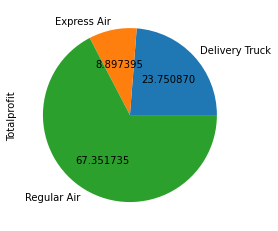

In [28]:
df.groupby("Ship Mode")["Totalprofit"].sum().plot(kind="pie",autopct="%2f") 
#percentage share of airways in total profit 

<AxesSubplot:ylabel='Totalexpenditure'>

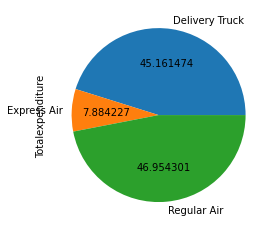

In [29]:
df.groupby("Ship Mode")["Totalexpenditure"].sum().plot(kind="pie",autopct="%2f")
#percentage share of delivery truck mode is high in total expenditure(45.16%)

In [32]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Year', 'Month', 'Day', 'TotalSales', 'Totalprofit',
       'Totalexpenditure'],
      dtype='object')

<AxesSubplot:ylabel='Totalprofit'>

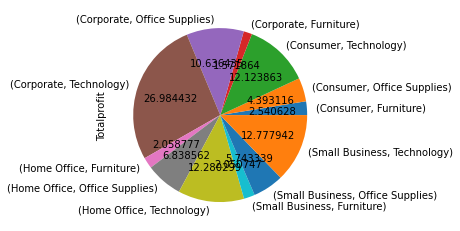

In [39]:
df.groupby(["Customer Segment","Product Category"])["Totalprofit"].sum().plot(kind="pie",autopct="%2f")
#being specific areas of revenue generation within Customer segment.

In [41]:
# profit and loss incurred from maximum and min number of item sold in a single consignment and identifying area of concern-
print("Total profit incurred from maximum no of items sold in a single consignment:",df[df["Order Quantity"]==max(df["Order Quantity"])]["Totalprofit"].max())
print("Total loss incurred from maximum number of items sold in a single consignment",df[df["Order Quantity"]==max(df["Order Quantity"])]["Totalprofit"].min())

print("Total profit incurred from minimum no of items sold in a single consigment:",df[df["Order Quantity"]==min(df["Order Quantity"])]["Totalprofit"].max())
print("Total loss incurred from minimum no of items sold in a single consigment:",df[df["Order Quantity"]==min(df["Order Quantity"])]["Totalprofit"].min())

Total profit incurred from maximum no of items sold in a single consignment: 667013.0
Total loss incurred from maximum number of items sold in a single consignment -323732.7
Total profit incurred from minimum no of items sold in a single consigment: 25.20675
Total loss incurred from minimum no of items sold in a single consigment: -11861.46


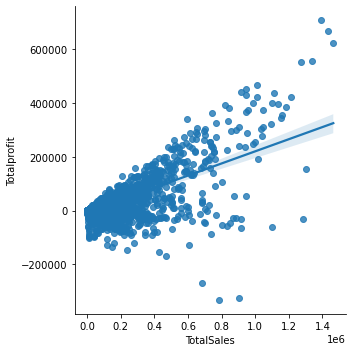

In [19]:
sns.lmplot(data=df,x="TotalSales",y="Totalprofit")
#although the data is more random(noisy) with quite a lot of outliers that need to be chekced.
#hence a predictive model building of total profit given the TotalSales attribute would make wrong prediction about total profit.

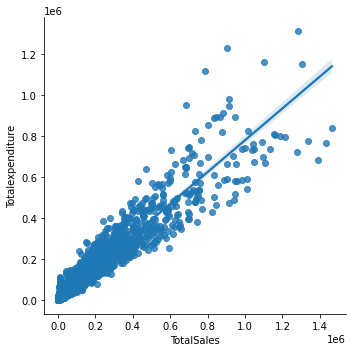

In [43]:
sns.lmplot(data=df,x="TotalSales",y="Totalexpenditure")
#although the correlation here seems to be partly noisy,there is an overall positive correlation between the two attributes.
#we can build a predictive regression model for predicting Total Expenditure during a particular consignment given that it is trained with many examples of Total sales and their predictors.

#INFERENCE FROM ABOVE PLOT-
-TO devise ways and means to tackle expenditure costs,its useful that we build a regression model to predict Total Expenditure given the Total Sales and its corresponding expenditure value.
-The totalexpenditure and totalsales attributes from given dataframe can be used as training set for any regression model(linear/instance) based ML algorithm.
-Hence for any new consignment,given the total sales occured,the stakeholders can come up with a predictive total expenditure value uing the model.
-If the actual Total Expenditure is above the predicted value of total expenditure,the management can devise ways and means to reduce the expenditure by finding grey areas,hence maximising the totalprofit inccured in the consignment.